## Preparing dataset
Is it possible to predict if patient will show up after making a medical appointment? 

The dataset is available on Kaggle, you can get it over [here](https://www.kaggle.com/joniarroba/noshowappointments)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
appointments = pd.read_csv('Appointments.csv')
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The names of columns have typos and they doesn't follow the same naming convention.

In [3]:
appointments.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 
                        'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
                        'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']

In [4]:
appointments.shape

(110527, 14)

The dataset has over 110k rows and 14 columns:
- __patient_id__ and __appointment_id__: Unique values for each patient and appointment
- __gender__: (F)emale or (M)ale
- __scheduled_day__: Day and time of scheduling appointment
- __appointment_day__: Day of appointment (no time!)
- __age__: Age of the patient
- __neighbourhood__: District of Vitoria, Brazil, where data was collected
- __scholarship__: Whether the patient is the part of [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) - Brazilian financial aid program
- __hypertension__, __diabetes__, __alcoholism__: Whether the patient has hypertension, diabetes or is an alcoholic
- __handicap__: 0 means no handicap, higher the value, more serious are disabilities (up to 4)
- __sms_received__: one or more messages sent to the patient
- __no_show__: "Yes" if no-show, "No" if patient arrived

In [5]:
appointments.dtypes

patient_id         float64
appointment_id       int64
gender              object
scheduled_day       object
appointment_day     object
age                  int64
neighbourhood       object
scholarship          int64
hypertension         int64
diabetes             int64
alcoholism           int64
handicap             int64
sms_received         int64
no_show             object
dtype: object

*Gender* and *neighbourhood* columns should be categorical, but we need *gender* as integers so it could work as a feature in our models. 

In [6]:
cols = ['gender', 'neighbourhood']

for col in cols:
    appointments[col] = appointments[col].astype('category')

cat = pd.Categorical(appointments['gender'])
appointments['gender'] = cat.codes

We need to map *no_show* column and convert it to integer.

In [7]:
appointments['no_show'] = appointments['no_show'].eq('Yes') # Check if element is equal to "Yes" and returns boolean values.
appointments['no_show'] = appointments['no_show'].astype('int64')

*Scheduled_day* and *appointment_day* columns are datetime.

In [8]:
cols = ['scheduled_day', 'appointment_day']
for col in cols:
    appointments[col] = appointments[col].astype('datetime64[ns]')
appointments.dtypes

patient_id                float64
appointment_id              int64
gender                       int8
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood            category
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                     int64
dtype: object

In [9]:
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null int8
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null category
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null int64
dtypes: category(1), datetime64[ns](2), float64(1), int64(9), int8(1)
memory usage: 10.3 MB


There are no null values in the dataset. For some reason *patient_id* is float instead of integer but it doesn't matter because we won't use it in our predictions.

In [10]:
variables = ['gender', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received']
for variable in variables:
    print(variable)
    print("Unique values:")
    print(appointments[variable].unique())
    print("Proportions:")
    print(appointments[variable].value_counts(normalize=True))
    print('\n')

gender
Unique values:
[0 1]
Proportions:
0    0.649977
1    0.350023
Name: gender, dtype: float64


scholarship
Unique values:
[0 1]
Proportions:
0    0.901734
1    0.098266
Name: scholarship, dtype: float64


hypertension
Unique values:
[1 0]
Proportions:
0    0.802754
1    0.197246
Name: hypertension, dtype: float64


diabetes
Unique values:
[0 1]
Proportions:
0    0.928135
1    0.071865
Name: diabetes, dtype: float64


alcoholism
Unique values:
[0 1]
Proportions:
0    0.9696
1    0.0304
Name: alcoholism, dtype: float64


handicap
Unique values:
[0 1 2 3 4]
Proportions:
0    0.979724
1    0.018475
2    0.001656
3    0.000118
4    0.000027
Name: handicap, dtype: float64


sms_received
Unique values:
[0 1]
Proportions:
0    0.678974
1    0.321026
Name: sms_received, dtype: float64




Almost 2 out of 3 patients are **women**.

Almost 10% of patients receive **government aid** in form of Bolsa Familia.

Almost 20% patients have **hypertension**.

7% of patients have **diabetes**.

3% of patients are **alcoholics**.

2% of patients have different kind of **disabillities**.

Almost 1/3 of patients **received SMS** reminding them about the visit.

Looks like the data in these columns is good and doesn't need any fixing. 

In [11]:
appointments['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

There is a value of -1 which cannot happen. Also the probability of patients older than 100 years in such a small dataset is extremely small, so I will delete them too. 

In [12]:
appointments = appointments[(appointments['age'] >= 0) & (appointments['age'] <= 100)]
appointments.shape

(110519, 14)

Totally 8 rows were dropped.

In [13]:
appointments['neighbourhood'].unique()

[JARDIM DA PENHA, MATA DA PRAIA, PONTAL DE CAMBURI, REPÚBLICA, GOIABEIRAS, ..., FRADINHOS, NAZARETH, AEROPORTO, ILHAS OCEÂNICAS DE TRINDADE, PARQUE INDUSTRIAL]
Length: 81
Categories (81, object): [JARDIM DA PENHA, MATA DA PRAIA, PONTAL DE CAMBURI, REPÚBLICA, ..., NAZARETH, AEROPORTO, ILHAS OCEÂNICAS DE TRINDADE, PARQUE INDUSTRIAL]

There are 81 different districts, for logistic regression I need to create 81 dummy variables (boolean values for each district). 

In [14]:
dummies_nbh = pd.get_dummies(appointments['neighbourhood'])
dummies_nbh.shape

(110519, 81)

In [15]:
appointments = pd.concat([appointments, dummies_nbh], axis=1)

Next we need to deal with the appointment and scheduled days. The best way is to create new variable showing how many days passed since the schedule until appointment. First we need to check if the appointment days are after the schedule, otherwise there are some mistakes in our dataset. 

In [16]:
appointments['waiting_time'] = appointments['appointment_day'] - appointments['scheduled_day']
appointments['waiting_time'].describe()

count                     110519
mean      9 days 17:08:49.813027
std      15 days 05:51:43.143676
min            -7 days +10:10:40
25%            -1 days +15:41:32
50%              3 days 11:23:20
75%      14 days 07:41:34.500000
max            178 days 13:19:01
Name: waiting_time, dtype: object

There is a lot of negative values over here, at least 25% of all appointments. However, we need to remember that *appointment_day* column doesn't have exact time stamp, only date. It means that every time the appointment is the same day as scheduling, the value will be negative. Let's check our suspicions.

In [17]:
appointments[['appointment_day', 'scheduled_day']].head()

,appointment_day,scheduled_day
0,2016-04-29,2016-04-29 18:38:08
1,2016-04-29,2016-04-29 16:08:27
2,2016-04-29,2016-04-29 16:19:04
3,2016-04-29,2016-04-29 17:29:31
4,2016-04-29,2016-04-29 16:07:23


In [18]:
(appointments['appointment_day'] - appointments['scheduled_day']).head()

0   -1 days +05:21:52
1   -1 days +07:51:33
2   -1 days +07:40:56
3   -1 days +06:30:29
4   -1 days +07:52:37
dtype: timedelta64[ns]

Even though the scheduling and appointment are the same day, the value in days is negative.

The solution is simple. We need to convert *waiting_time* column to numeric showing number of days, then add 1 day to each record and remove any value smaller than zero. 

In [19]:
appointments['waiting_time'] = appointments['waiting_time'].dt.days
appointments['waiting_time'] = appointments['waiting_time'] + 1
appointments = appointments[appointments['waiting_time'] >= 0]
appointments['waiting_time'].describe()

count    110514.000000
mean         10.184438
std          15.255288
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_time, dtype: float64

Now we have all columns needed to do further analysis and predictions. Let's drop unnecessary columns.

In [20]:
appointments = appointments.drop(['patient_id', 'appointment_id', 'scheduled_day', 'appointment_day', 'neighbourhood'], axis=1)

## Data exploration

Our dataset is ready, now we can take a quick look at our variables and their influence for not showing after appointment.

In [21]:
appointments['no_show'].value_counts(normalize=True)

0    0.798116
1    0.201884
Name: no_show, dtype: float64

Around 20% of all appointments finished with patient not showing up. The data is quite imbalanced, we have to consider that when we will create models. 

In [22]:
appointments['waiting_time'].value_counts(normalize=True).head()

0    0.348915
2    0.060843
4    0.047867
1    0.047170
7    0.044393
Name: waiting_time, dtype: float64

35% of patients have their appointment **the same day** as it was scheduled.

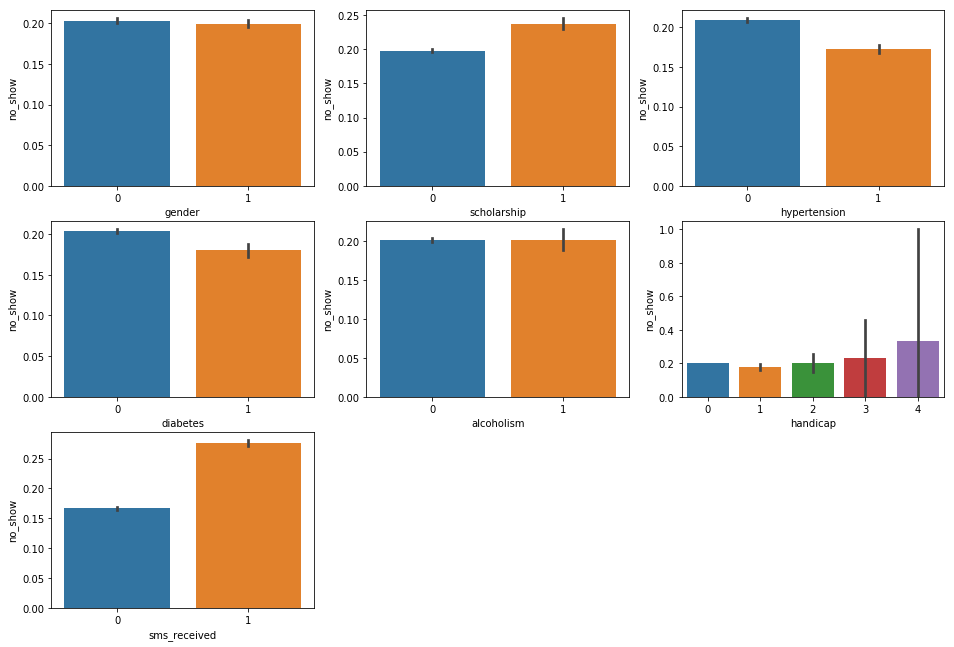

In [23]:
categorical_cols = ['gender', 'scholarship', 'hypertension', 'diabetes', 
                    'alcoholism', 'handicap', 'sms_received']
fig = plt.figure(figsize=(16, 11))

for index, col in enumerate(categorical_cols):
    ax = fig.add_subplot(3, 3, index+1)
    sns.barplot(x=col, y="no_show", data=appointments)

Gender and alcoholism doesn't have real impact on whether patient will show up for appointment or not. It's a little strange that alcoholism doesn't affect the results. 

People with financial aid from the government are more likely to skip their visit. 

People with hypertension, diabetes and those handicapped are more likely to arrive for the appointment. It makes sense, they already have some issues requiring more attention to their health condition.

What's interesting, people who received text messages reminding about appointment are less likely to come. However, in this case I think we need to filter out situations when the appointment is the same day as scheduling. Hospitals probably don't send SMS when that is the case. Let's check if that will change anything. We'll set minimal waiting time for 3 days. 

0.5430714660585989


0    0.703351
1    0.296649
Name: no_show, dtype: float64

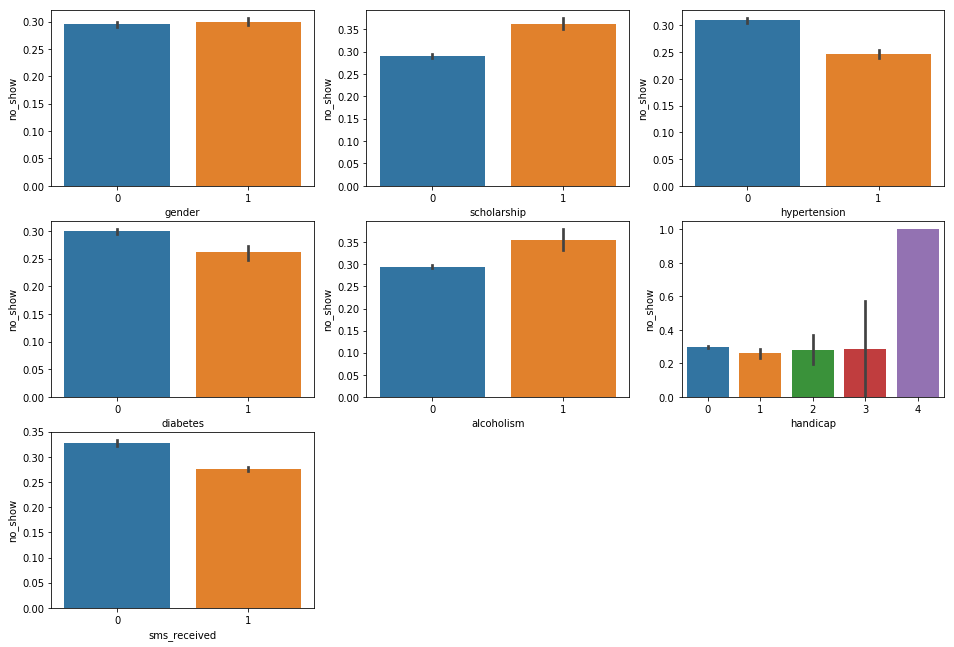

In [24]:
categorical_cols = ['gender', 'scholarship', 'hypertension', 'diabetes', 
                    'alcoholism', 'handicap', 'sms_received']
fig = plt.figure(figsize=(16, 11))

for index, col in enumerate(categorical_cols):
    ax = fig.add_subplot(3, 3, index+1)
    sns.barplot(x=col, y="no_show", data=appointments[appointments['waiting_time'] >= 3])
    
# Check how big proportion of our dataset will fall here and proportion of people not showing up
print(len(appointments[appointments['waiting_time'] >= 3]) / len(appointments))
appointments[appointments['waiting_time'] >= 3]['no_show'].value_counts(normalize=True)

My assumptions were true. When we filter out short waiting time (hospitals probably don't send SMS then), you can see that sending reminders by phone increased proportion of people showing up for appointment. Also, you can see that people with alcoholism are less likely to show up for appointments, which is true with our intuition. 

In our dataset only 54% of people wait for their appointment 3 days or longer. In this group percentage of people not showing up increased from 0.208 to 0.297.

## Building models
### Training and testing datasets

In [25]:
from sklearn.model_selection import train_test_split
features = appointments.drop("no_show", axis=1)
target = appointments['no_show']
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.25, random_state=42195)

### Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [27]:
lr = LogisticRegression()
lr.fit(train_features, train_target)
predictions = lr.predict(test_features)
acc_lr = accuracy_score(test_target, predictions)
mse_lr = mean_squared_error(test_target, predictions)
rmse_lr = np.sqrt(mse_lr)
print(acc_lr)
print(mse_lr)
print(rmse_lr)

0.798689782475
0.201310217525
0.448676071933


Accuracy score of basic logistic model is 0.7987.

In [28]:
scores = pd.DataFrame(columns=['Model', 'Accuracy', 'MSE', 'RMSE'])  # DataFrame containing all scores
scores = scores.append({
    'Model' : 'Logistic Regression' , 
    'Accuracy' : acc_lr,
    'MSE': mse_lr,
    'RMSE': rmse_lr
    }, ignore_index=True)

In [29]:
# Logistic regression with class balanced
lr = LogisticRegression(class_weight='balanced')
lr.fit(train_features, train_target)
predictions = lr.predict(test_features)
acc_lr_bal = accuracy_score(test_target, predictions)
mse_lr_bal = mean_squared_error(test_target, predictions)
rmse_lr_bal = np.sqrt(mse_lr_bal)
print(acc_lr_bal)
print(mse_lr_bal)
print(rmse_lr_bal)
scores = scores.append({
    'Model' : 'Logistic Regression Balanced' , 
    'Accuracy' : acc_lr_bal,
    'MSE': mse_lr_bal,
    'RMSE': rmse_lr_bal
    }, ignore_index=True)

0.663831481414
0.336168518586
0.579800412716


In [30]:
# Logistic regression with selection of penalties
penalty_accuracy = {}
penalty_mse = {}
for i in range(1, 20):
    penalty = {
        0: i,
        1: 1,
    }
    lr = LogisticRegression(class_weight=penalty)
    lr.fit(train_features, train_target)
    predictions = lr.predict(test_features)
    acc = accuracy_score(test_target, predictions)
    mse = mean_squared_error(test_target, predictions)
    penalty_accuracy[i] = acc
    penalty_mse[i] = mse
print(penalty_accuracy)
print(penalty_mse)

{1: 0.79868978247493572, 2: 0.8012957399833508, 3: 0.8015129031090521, 4: 0.8016576785261863, 5: 0.80176626008903684, 6: 0.80173006623475329, 7: 0.80187484165188749, 8: 0.80191103550617104, 9: 0.80191103550617104, 10: 0.80191103550617104, 11: 0.80191103550617104, 12: 0.80191103550617104, 13: 0.80191103550617104, 14: 0.80191103550617104, 15: 0.80191103550617104, 16: 0.80191103550617104, 17: 0.80191103550617104, 18: 0.80191103550617104, 19: 0.80191103550617104}
{1: 0.20131021752506426, 2: 0.19870426001664918, 3: 0.19848709689094793, 4: 0.19834232147381375, 5: 0.19823373991096313, 6: 0.19826993376524665, 7: 0.19812515834811248, 8: 0.19808896449382896, 9: 0.19808896449382896, 10: 0.19808896449382896, 11: 0.19808896449382896, 12: 0.19808896449382896, 13: 0.19808896449382896, 14: 0.19808896449382896, 15: 0.19808896449382896, 16: 0.19808896449382896, 17: 0.19808896449382896, 18: 0.19808896449382896, 19: 0.19808896449382896}


After reaching accuracy score of 0.8019 with penalty score = 8 there is no further improvement in the model. It's a little suspicious, we should check the predictions. 

In [31]:
sum(predictions)

0

Our data is imbalanced (more people show up for the appointments) and that caused that 'good' model just assumes that there are zero no-shows. Thanks to that it achieved high accuracy. This approach is clearly wrong and we have to fix that. We can down-sample patients in our starting dataset and then start from the scratch.

In [32]:
print(len(appointments[appointments['no_show'] == 1]))
len(appointments[appointments['no_show'] == 0]) / len(appointments[appointments['no_show'] == 1])

22311


3.953341401102595

There is almost 4 times more patient that show up for their appointments than no-shows. Because we have over 100k rows, we can get smaller sample and still get good results. 

In [33]:
from sklearn.utils import resample
show = appointments[appointments['no_show'] == 0]
no_show = appointments[appointments['no_show'] == 1]
show_downsample = resample(show, 
                           replace=True,
                           n_samples=len(appointments[appointments['no_show'] == 1]),
                           random_state=42195)

In [34]:
appointments_downsample = pd.concat([show_downsample, no_show])
features = appointments_downsample.drop('no_show', axis=1)
target = appointments_downsample['no_show']
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.25, random_state=42195)

Now we can start building models from the beginning.

In [35]:
lr = LogisticRegression()
lr.fit(train_features, train_target)
predictions = lr.predict(test_features)
acc_lr = accuracy_score(test_target, predictions)
mse_lr = mean_squared_error(test_target, predictions)
rmse_lr = np.sqrt(mse_lr)
print(acc_lr)
print(mse_lr)
print(rmse_lr)

0.635711724632
0.364288275368
0.603562983762


This time our accuracy for basic logistic regression dropped to 0.6357 compared to 0.7987 earlier, but it doesn't mean our model is worse, especially because now the dataset is more balanced.

In [36]:
scores = pd.DataFrame(columns=['Model', 'Accuracy', 'MSE', 'RMSE'])  # DataFrame containing all scores
scores = scores.append({
    'Model' : 'Logistic Regression' , 
    'Accuracy' : acc_lr,
    'MSE': mse_lr,
    'RMSE': rmse_lr
    }, ignore_index=True)

In [37]:
# Logistic regression with class balanced
lr = LogisticRegression(class_weight='balanced')
lr.fit(train_features, train_target)
predictions = lr.predict(test_features)
acc_lr_bal = accuracy_score(test_target, predictions)
mse_lr_bal = mean_squared_error(test_target, predictions)
rmse_lr_bal = np.sqrt(mse_lr_bal)
print(acc_lr_bal)
print(mse_lr_bal)
print(rmse_lr_bal)
scores = scores.append({
    'Model' : 'Logistic Regression Balanced' , 
    'Accuracy' : acc_lr_bal,
    'MSE': mse_lr_bal,
    'RMSE': rmse_lr_bal
    }, ignore_index=True)

0.635891000359
0.364108999641
0.603414450972


## K-Nearest Neighbours

In [38]:
from sklearn.neighbors import KNeighborsClassifier

highest_acc_neighbours = 0
knn_accuracy = 0
knn_mse = 0
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_features)
    acc = accuracy_score(test_target, predictions)
    mse = mean_squared_error(test_target, predictions)
    if acc > knn_accuracy:
        knn_accuracy = acc
        highest_acc_neighbours = i
        knn_mse = mse
print(knn_accuracy)
print(knn_mse)
print(highest_acc_neighbours) 

0.667533166009
0.332466833991
19


In [39]:
scores = scores.append({
    'Model' : 'K-Nearest Neighbours' , 
    'Accuracy' : knn_accuracy,
    'MSE': knn_mse,
    'RMSE': np.sqrt(knn_mse)
    }, ignore_index=True)

## Random Forests

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=0)
rf.fit(train_features, train_target)
predictions = rf.predict(test_features)

acc_rf = accuracy_score(test_target, predictions)
mse_rf = mean_squared_error(test_target, predictions)
rmse_rf = np.sqrt(mse_rf)
print(acc_rf)
print(mse_rf)
print(rmse_rf)
scores = scores.append({
    'Model' : 'Random Forests' , 
    'Accuracy' : acc_rf,
    'MSE': mse_rf,
    'RMSE': rmse_rf
    }, ignore_index=True)

0.674704195052
0.325295804948
0.570347091645


## Support Vector Machines

In [41]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(train_features, train_target)
predictions = svm.predict(test_features)

acc_svm = accuracy_score(test_target, predictions)
mse_svm = mean_squared_error(test_target, predictions)
rmse_svm = np.sqrt(mse_svm)
print(acc_svm)
print(mse_svm)
print(rmse_svm)
scores = scores.append({
    'Model' : 'Support Vector Machines' , 
    'Accuracy' : acc_svm,
    'MSE': mse_svm,
    'RMSE': rmse_svm
    }, ignore_index=True)

0.57269630692
0.42730369308
0.65368470464


In [42]:
scores

,Model,Accuracy,MSE,RMSE
0,Logistic Regression,0.635712,0.364288,0.603563
1,Logistic Regression Balanced,0.635891,0.364109,0.603414
2,K-Nearest Neighbours,0.667533,0.332467,0.576599
3,Random Forests,0.674704,0.325296,0.570347
4,Support Vector Machines,0.572696,0.427304,0.653685


The best model is **Random Forests**, which returned accuracy score of 0.674704. 